In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [3]:
dirname = os.path.join(os.getcwd(), 'entrelineas')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /Users/katyacruz/entrelineas/
/Users/katyacruz/entrelineas/domo 1
/Users/katyacruz/entrelineas/horizontal 427
/Users/katyacruz/entrelineas/fallas 162
/Users/katyacruz/entrelineas/graben 189
/Users/katyacruz/entrelineas/entrampamientos 31
Directorios leidos: 5
Imagenes en cada directorio [428, 162, 189, 31, 92]
suma Total de imagenes en subdirs: 902


In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  902


In [6]:
sismica=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    sismica.append(name[len(name)-1])
    indice=indice+1

0 domo
1 horizontal
2 fallas
3 graben
4 entrampamientos


In [7]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


In [19]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.4)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (541, 449, 696, 3) (541,)
Testing data shape :  (361, 449, 696, 3) (361,)


Text(0.5, 1.0, 'Ground Truth : 2')

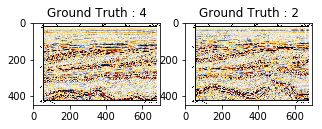

In [20]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [22]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [23]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]


In [24]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.8, random_state=13)

In [25]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(108, 449, 696, 3) (433, 449, 696, 3) (108, 5) (433, 5)


In [26]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [27]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(449,696,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [28]:
sport_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 449, 696, 32)      896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 449, 696, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 225, 348, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 225, 348, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2505600)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                80179232  
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32)                0         
__________

In [29]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

In [30]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en la Mac tardo 2hrs segundo intento
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))

Instructions for updating:
Use tf.cast instead.
Train on 108 samples, validate on 433 samples
Epoch 1/6
108/108 [==============================] - 1078s 10s/step - loss: 1.9682 - acc: 0.2870 - val_loss: 2.3105 - val_acc: 0.1986
Epoch 2/6
108/108 [==============================] - 1138s 11s/step - loss: 2.1209 - acc: 0.2500 - val_loss: 1.5331 - val_acc: 0.1986
Epoch 3/6
108/108 [==============================] - 831s 8s/step - loss: 1.4825 - acc: 0.3889 - val_loss: 1.3684 - val_acc: 0.4758
Epoch 4/6
108/108 [==============================] - 994s 9s/step - loss: 1.2910 - acc: 0.5093 - val_loss: 1.2640 - val_acc: 0.4758
Epoch 5/6
108/108 [==============================] - 1128s 10s/step - loss: 1.2535 - acc: 0.5000 - val_loss: 1.2564 - val_acc: 0.4758
Epoch 6/6
108/108 [==============================] - 1043s 10s/step - loss: 1.2258 - acc: 0.5000 - val_loss: 1.1931 - val_acc: 0.6882


In [31]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("sports_mnist.h5py")

In [32]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)
 
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

361/361 [==============================] - 60s 166ms/step
Test loss: 1.1984493633386502
Test accuracy: 0.6620498616609547


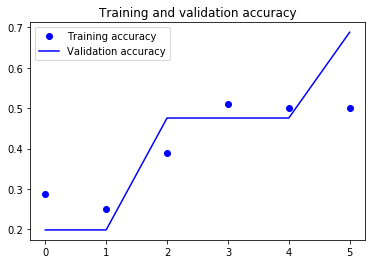

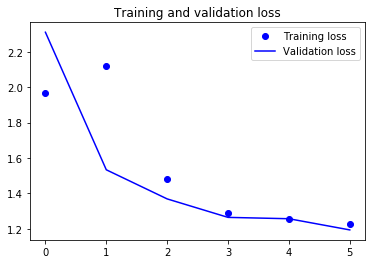

In [33]:
accuracy = sport_train.history['acc']
val_accuracy = sport_train.history['val_acc']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
predicted_classes2 = sport_model.predict(test_X)

In [35]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [36]:
predicted_classes.shape, test_Y.shape

((361,), (361,))

Found 239 correct labels


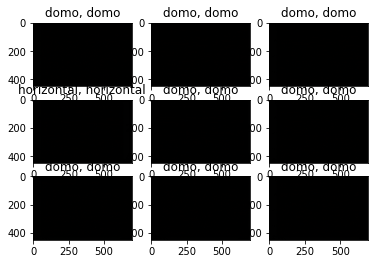

In [37]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(449,696,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(sismica[predicted_classes[correct]],
                                                    sismica[test_Y[correct]]))

Found 122 incorrect labels


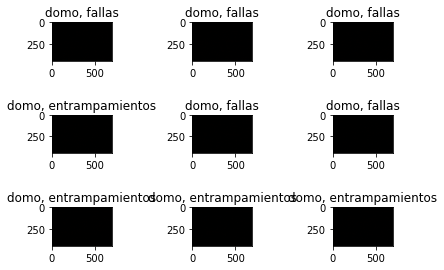

In [38]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(449,696,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(sismica[predicted_classes[incorrect]],
                                                    sismica[test_Y[incorrect]]))
    
    plt.tight_layout()

In [39]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.60      1.00      0.75       168
     Class 1       0.82      0.71      0.76        66
     Class 2       0.92      0.31      0.46        78
     Class 3       0.00      0.00      0.00        14
     Class 4       0.00      0.00      0.00        35

   micro avg       0.66      0.66      0.66       361
   macro avg       0.47      0.40      0.40       361
weighted avg       0.63      0.66      0.59       361



/Users/katyacruz/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
